In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils.inference import ecg_noise_quantification


#### 🔗 Pretrained Model
You can download the pretrained latent diffusion model from 🤗 Hugging Face:

👉 [Download pretrained model](https://huggingface.co/Taeseong-Han/ECGNoiseQuantification/blob/main/pretrained_ldm.pth)

In [2]:
checkpoint_path = "./output/pretrained_ldm.pth"  # Download the pretrained model and update the checkpoint path accordingly
ecg = np.load("./data/database/ecg_example.npz")['signal']

output = ecg_noise_quantification(
    ecg=ecg,
    sampling_freq=500,
    checkpoint_path=checkpoint_path,
    n_partitions=1,
)

print(ecg.shape)
print(output.cleaned_image.shape)  # (leads, segments, H, W)
print(output.original_image.shape)  # (leads, segments, H, W)
print(output.psnr.shape)  # (leads, segments)

(5000,)
(1, 1, 32, 256)
(1, 1, 32, 256)
(1, 1)


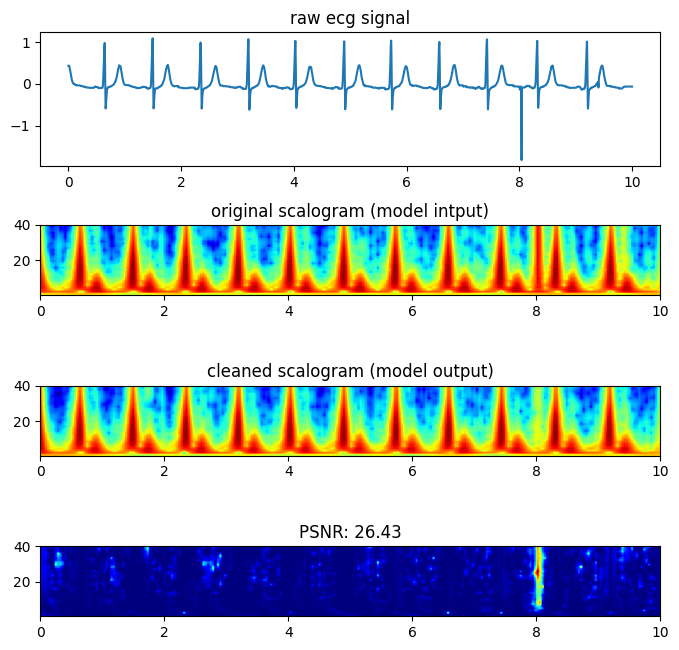

In [3]:
plt.figure(figsize=(8, 8))

plt.subplot(4, 1, 1)
plt.title("raw ecg signal")
t_signal = np.linspace(0, 10, len(ecg))
plt.plot(t_signal, ecg)

plt.subplot(4, 1, 2)
plt.title("original scalogram (model intput)")
original_image = np.squeeze(output.original_image)
plt.imshow(original_image, cmap='jet', extent=[0, 10, 0.5, 40], aspect=1/35)

plt.subplot(4, 1, 3)
plt.title("cleaned scalogram (model output)")
cleaned_image = np.squeeze(output.cleaned_image)
plt.imshow(cleaned_image, cmap='jet', extent=[0, 10, 0.5, 40], aspect=1/35)

plt.subplot(4, 1, 4)
plt.title(f"PSNR: {output.psnr[0, 0]:.2f}")
# For visualization purposes, mean squared error (MSE) is shown;
# PSNR is computed based on MSE
mse = (original_image - cleaned_image) ** 2
plt.imshow(mse, cmap='jet', extent=[0, 10, 0.5, 40], aspect=1/35)

In [4]:
checkpoint_path = "./output/pretrained_ldm.pth"  # Download the pretrained model and update the checkpoint path accordingly
ecg = np.load("./data/database/ecg_example.npz")['signal']

output = ecg_noise_quantification(
    ecg=ecg,
    sampling_freq=500,
    checkpoint_path=checkpoint_path,
    n_partitions=8,
)

print(ecg.shape)
print(output.cleaned_image.shape)  # (leads, segments, H, W)
print(output.original_image.shape)  # (leads, segments, H, W)
print(output.psnr.shape)  # (leads, segments)

(5000,)
(1, 1, 32, 256)
(1, 1, 32, 256)
(1, 8)


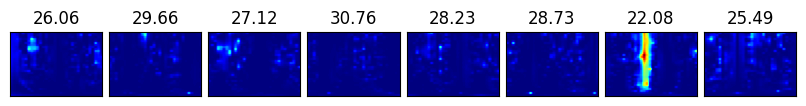

In [35]:
# 전체 mse에서 최소/최대값 구하기
vmin = mse.min()
vmax = mse.max()

plt.figure(figsize=(8, 1))

for i in range(8):

    ax = plt.subplot(1, 8, i + 1)
    plt.title(f"{output.psnr[0,i]:.2f}")
    ax.imshow(mse[:, i*32:(i+1)*32], cmap='jet', extent=[0, 10, 0.5, 40], vmin=vmin, vmax=vmax)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_aspect('auto')

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.tight_layout(pad=0.5)
plt.show()